In [111]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [112]:
import pandas as pd
from pandasql import sqldf
df = pd.DataFrame({'name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'], 'age': [25, 30, 35, 40, 45], 'gender': ['F', 'M', 'M', 'M', 'F']})
query = "SELECT * FROM df WHERE age > 20"
result = sqldf(query)
print(result['name'])

0      Alice
1        Bob
2    Charlie
3      David
4        Eve
Name: name, dtype: object


In [113]:
# Read excel file with 16 sheets
filename = 'data_schema_final.xlsx'
customers = pd.read_excel(io=filename, sheet_name='Customers')
customer_assets = pd.read_excel(io=filename, sheet_name='Customer_Assets')
asset_objectives = pd.read_excel(io=filename, sheet_name='Asset_Objectives')
questions = pd.read_excel(io=filename, sheet_name='Questions')
answers = pd.read_excel(io=filename, sheet_name='Answers')
customer_answers = pd.read_excel(io=filename, sheet_name='Customer_Answers')
risk_profile = pd.read_excel(io=filename, sheet_name='Risk_Profile')
asset_classes = pd.read_excel(io=filename, sheet_name='Asset_Classes')
fee_structures = pd.read_excel(io=filename, sheet_name='Fee_Structures')
potential_funds = pd.read_excel(io=filename, sheet_name='Potential_Funds')
fund_assets = pd.read_excel(io=filename, sheet_name='Fund_Assets')
customer_funds = pd.read_excel(io=filename, sheet_name='Customer_Funds')
fund_targets = pd.read_excel(io=filename, sheet_name='Fund_Targets')
engagement_frequencies = pd.read_excel(io=filename, sheet_name='Engagement_Frequencies')
engagement_types = pd.read_excel(io=filename, sheet_name='Engagement_Types')
customer_engagement_preferences = pd.read_excel(io=filename, sheet_name='Customer_Engagement_Preferences')

In [114]:
customers.columns = customers.columns.str.lower()
customer_assets.columns = customer_assets.columns.str.lower()
customer_answers.columns = customer_answers.columns.str.lower()
answers.columns = answers.columns.str.lower()
risk_profile.columns = risk_profile.columns.str.lower()
# .columns = .columns.str.lower()

In [115]:
# Outlier Analysis on Total Column
customers_final = customers.merge(customer_assets, on="customer_id", how="inner")

883


Text(0.5, 1.0, 'only outliers')

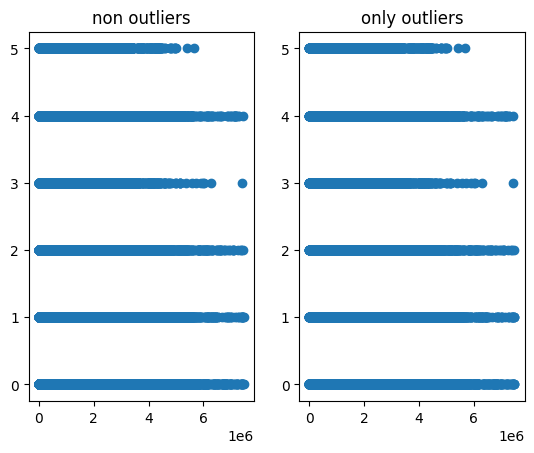

In [116]:
from scipy import stats

z = stats.zscore(customers_final["total"])
cleaned1 = customers_final[np.abs (z) <= 3]
outliers1 =  customers_final[np.abs (z) >= 3]

print(len(outliers1))

fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.scatter(customers_final["total"], customers_final["number_of_dependents"])
ax1.set_title("non outliers")
ax2.scatter(customers_final["total"], customers_final["number_of_dependents"])
ax2.set_title("only outliers")


Text(0.5, 1.0, 'Cleaned')

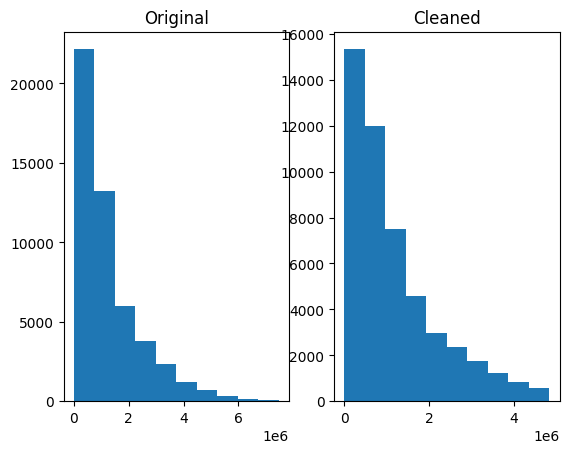

In [119]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.hist(customers_final["total"])
# ax1.set_xlim([0, 300])
ax1.set_title("Original")
ax2.hist(cleaned1["total"])
# ax2.set_xlim(0, 300)
ax2.set_title("Cleaned")

In [120]:
cleaned1

,customer_id,contact_last_name,contact_first_name,street,city,state,zip,country,age,marital_status,gender,number_of_dependents,asset_objective_id,total
0,1,Chaney,Jemima,5584 Orci Street,Lexington,Kentucky,36751,United States,65,Married,Male,0,1,1.157902e+05
1,1,Chaney,Jemima,5584 Orci Street,Lexington,Kentucky,36751,United States,65,Married,Male,0,2,7.978310e+05
2,1,Chaney,Jemima,5584 Orci Street,Lexington,Kentucky,36751,United States,65,Married,Male,0,3,8.950859e+05
3,1,Chaney,Jemima,5584 Orci Street,Lexington,Kentucky,36751,United States,65,Married,Male,0,4,1.115145e+06
4,1,Chaney,Jemima,5584 Orci Street,Lexington,Kentucky,36751,United States,65,Married,Male,0,5,7.920459e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,10000,Wyatt,Quinlan,947-2345 In Ave,Wilmington,Delaware,32510,United States,75,Married,Unknown,0,1,2.904697e+06
49996,10000,Wyatt,Quinlan,947-2345 In Ave,Wilmington,Delaware,32510,United States,75,Married,Unknown,0,2,8.633428e+05
49997,10000,Wyatt,Quinlan,947-2345 In Ave,Wilmington,Delaware,32510,United States,75,Married,Unknown,0,3,3.029330e+06
49998,10000,Wyatt,Quinlan,947-2345 In Ave,Wilmington,Delaware,32510,United States,75,Married,Unknown,0,4,1.393821e+06


In [122]:
len(outliers1)

883

In [123]:
outliers1

,customer_id,contact_last_name,contact_first_name,street,city,state,zip,country,age,marital_status,gender,number_of_dependents,asset_objective_id,total
32,7,Johns,Cody,"P.O. Box 982, 4921 Est Road",Lakewood,Colorado,92388,United States,65,Married,Female,0,3,4.976283e+06
53,11,Valencia,Walker,"P.O. Box 253, 9123 Elit. Road",Philadelphia,Pennsylvania,79522,United States,65,Married,Female,0,4,7.218635e+06
98,20,Hendrix,Mariko,3585 Rhoncus Rd.,Harrisburg,Pennsylvania,49282,United States,65,Married,Male,0,4,4.854999e+06
197,40,Perez,Noelle,Ap #799-4300 Ipsum. St.,Columbus,Georgia,19140,United States,65,Married,Female,4,3,5.304698e+06
357,72,Franco,Sybill,"P.O. Box 949, 8765 Natoque St.",Toledo,Ohio,39591,United States,65,Married,Female,1,3,5.181561e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49728,9946,Frye,Sylvester,"P.O. Box 444, 4168 Nunc Road",Baltimore,Maryland,95076,United States,75,Married,Female,1,4,7.410972e+06
49743,9949,Marquez,Brendan,"P.O. Box 512, 6041 Nibh. Avenue",Miami,Florida,73990,United States,75,Married,Female,0,4,6.594929e+06
49753,9951,Mueller,Astra,Ap #918-4856 Dolor. St.,San Francisco,California,96947,United States,75,Married,Female,0,4,5.016431e+06
49898,9980,Watson,Mari,399-7476 Dis Road,Harrisburg,Pennsylvania,59418,United States,75,Married,Female,0,4,6.459665e+06


In [126]:
customers_final1 = cleaned1
rm = outliers1['customer_id']

In [127]:
rm

32          7
53         11
98         20
197        40
357        72
         ... 
49728    9946
49743    9949
49753    9951
49898    9980
49908    9982
Name: customer_id, Length: 883, dtype: int64

In [133]:
customers = customers[~customers['customer_id'].isin(rm)]
customer_assets = customer_assets[~customer_assets['customer_id'].isin(rm)]
customer_answers = customer_answers[~customer_answers['customer_id'].isin(rm)]
# customer_funds = customer_funds[~customer_funds['customer_ID'].isin(rm)]
customer_engagement_preferences = customer_engagement_preferences[~customer_engagement_preferences['Customer_ID'].isin(rm)]

In [134]:
print(len(customers))

9169


In [ ]:
# #### to be continued from here

In [121]:
merged_df=pd.merge(customer_answers,answers,on=['question_id','answer_id'],how='outer')
merged_df.sort_values(by='customer_id',inplace=True)
merged_df.dropna(inplace=True)
avg_score=merged_df.groupby('customer_id')['risk_profile_id'].mean()
score_dict=avg_score.to_dict()
risk_score_df=pd.DataFrame(score_dict.items(), columns=['customer_id', 'risk_score'])
print(risk_score_df)


      customer_id  risk_score
0               1    2.833333
1               2    4.000000
2               3    3.000000
3               4    2.833333
4               5    2.833333
...           ...         ...
9995         9996    3.142857
9996         9997    2.857143
9997         9998    2.833333
9998         9999    2.833333
9999        10000    2.833333

[10000 rows x 2 columns]


In [6]:
wealth_investor_constraint=risk_score_df[risk_score_df['risk_score']>=2]
wealth_investor_constraint=risk_score_df[risk_score_df['risk_score']<=4]
risk_score_counts = wealth_investor_constraint['risk_score'].value_counts()
risk_score_counts

risk_score
2.833333    1051
3.000000     962
2.857143     443
3.142857     386
3.285714     359
3.500000     332
4.000000     307
2.500000     284
3.125000     283
2.714286     280
3.428571     275
3.571429     268
3.166667     257
2.571429     252
2.875000     238
3.250000     229
3.714286     205
3.857143     203
3.333333     197
2.666667     188
3.375000     179
2.750000     179
2.428571     171
2.625000     149
3.666667     149
3.625000     146
3.750000     123
2.333333     112
3.833333      99
2.285714      99
3.200000      90
2.375000      87
3.875000      68
2.142857      62
2.000000      61
2.800000      53
2.250000      46
3.600000      46
2.166667      46
2.600000      37
3.400000      34
3.800000      31
2.125000      27
2.400000      25
2.200000      22
1.833333      12
1.857143       7
1.800000       6
1.666667       3
1.875000       2
1.750000       2
1.714286       2
1.500000       2
1.400000       1
1.250000       1
Name: count, dtype: int64

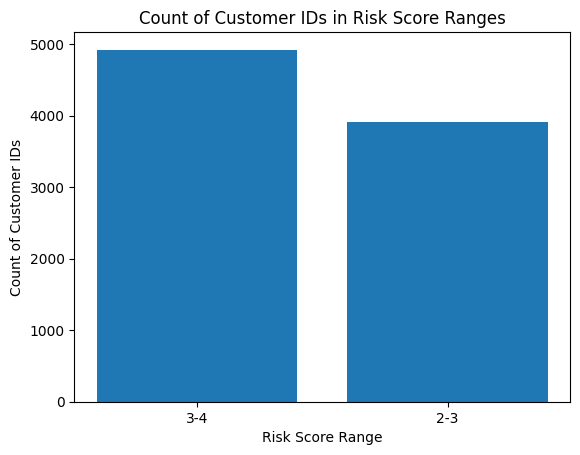

Summary Statistics of Risk Scores:
count    9178.000000
mean        3.068075
std         0.455969
min         1.250000
25%         2.833333
50%         3.000000
75%         3.375000
max         4.000000
Name: risk_score, dtype: float64
Proportion of Customers with Risk Score > 3: 0.4648071475266943


In [7]:
data=wealth_investor_constraint
ranges = [(2, 3), (3, 4)]
labels = ['2-3', '3-4']
data['risk_score_range'] = pd.cut(data['risk_score'], bins=[2, 3, 4], labels=labels, right=False)
risk_score_counts = data['risk_score_range'].value_counts()
plt.bar(risk_score_counts.index, risk_score_counts.values)
plt.xlabel('Risk Score Range')
plt.ylabel('Count of Customer IDs')
plt.title('Count of Customer IDs in Risk Score Ranges')
plt.show()

# Calculate summary statistics of the risk scores
risk_score_summary = data['risk_score'].describe()
print("Summary Statistics of Risk Scores:")
print(risk_score_summary)

# Calculate the proportion of customers with a risk score greater than 3
proportion_above_3 = (data['risk_score'] > 3).mean()
print("Proportion of Customers with Risk Score > 3:", proportion_above_3)

Customer with Max Asset: 718
 Asset: customer_id
1     3.715898e+06
2     7.230893e+06
3     5.871863e+06
4     1.274188e+07
5     8.836557e+06
6     8.818253e+06
7     1.259432e+07
8     8.972242e+06
9     6.891288e+06
10    1.041533e+07
Name: total, dtype: float64


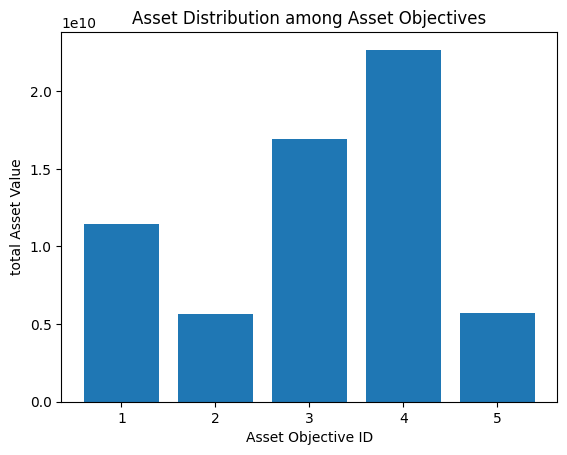

In [8]:
# Analysis of Customer Asset Vs Objectives
max_asset_customer = customer_assets.groupby('customer_id')['total'].sum().idxmax()
print("Customer with Max Asset:", max_asset_customer)
max_asset_customer2 = customer_assets.groupby('customer_id')['total'].sum()
print(" Asset:", max_asset_customer2[:10])
# Asset Distribution among Asset Objectives
asset_distribution = customer_assets.groupby('asset_objective_id')['total'].sum()
# bar chart to visualize the distribution
plt.bar(asset_distribution.index, asset_distribution.values)
plt.xlabel('Asset Objective ID')
plt.ylabel('total Asset Value')
plt.title('Asset Distribution among Asset Objectives')
plt.show()

In [9]:
query = "select asset_objective_id, sum(total)/1e+9 from customer_assets group by asset_objective_id order by sum(total) desc"
result = sqldf(query)
print(result)

   asset_objective_id  sum(total)/1e+9
0                   4        22.676222
1                   3        16.956153
2                   1        11.417682
3                   5         5.730511
4                   2         5.620531


In [10]:
# # asset objective id 4 has max total amount invested
# 4 - retirement
# 3 - family planning
# 1 - general savings
# 5 - unknown
# 2 - home ownership

In [11]:
# AGE 60-70
query = "select a.asset_objective_id, sum(a.total)/1e+9 from customer_assets a join customers c on a.customer_id = c.customer_id where c.age>60 and c.age<70 group by asset_objective_id order by sum(total) desc"
result = sqldf(query)
print(result)

   asset_objective_id  sum(a.total)/1e+9
0                   4           7.087677
1                   3           5.268625
2                   1           3.586768
3                   5           1.780572
4                   2           1.779182


In [12]:
# AGE 30-40
query = "select a.asset_objective_id, sum(a.total)/1e+9 from customer_assets a join customers c on a.customer_id = c.customer_id where c.age>30 and c.age<40 group by asset_objective_id order by sum(total) desc"
result = sqldf(query)
print(result)

   asset_objective_id  sum(a.total)/1e+9
0                   4           2.693684
1                   3           2.020749
2                   1           1.337673
3                   5           0.684490
4                   2           0.666374


In [13]:
# age and total for asset_objective_id = 4
query = "select c.customer_id, c.age, a.total from customer_assets a join customers c on a.customer_id = c.customer_id where a.asset_objective_id = 4 order by c.age"
result = sqldf(query)
print(result)

      customer_id  age         total
0             841   33  1.089264e+04
1             842   33  1.770937e+06
2             843   33  1.475547e+05
3             844   33  2.242903e+06
4             845   33  1.484654e+06
...           ...  ...           ...
9995         9996   75  7.187422e+05
9996         9997   75  3.325183e+06
9997         9998   75  5.310614e+05
9998         9999   75  2.940355e+06
9999        10000   75  1.393821e+06

[10000 rows x 3 columns]


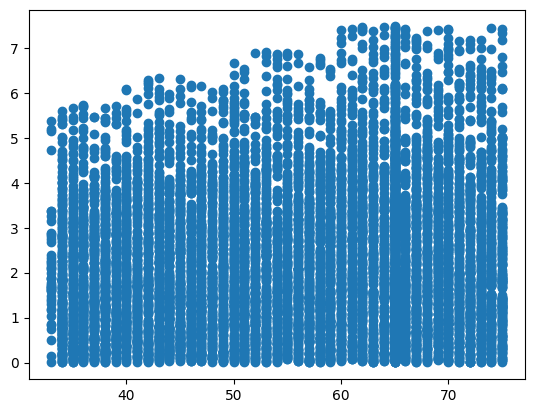

In [14]:
plt.scatter(result['age'], result['total'] / 1e+06)

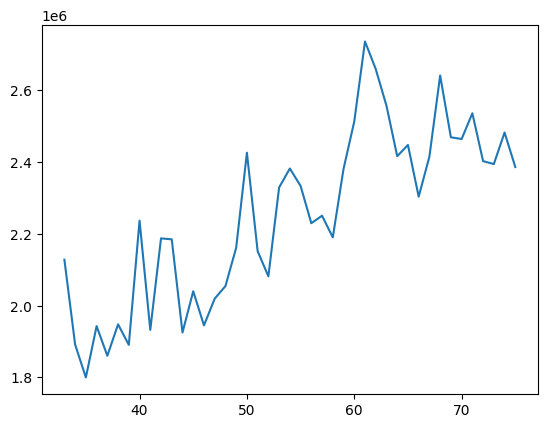

In [16]:
arr1 = result.groupby('age')['total'].mean()
# print(arr1)
plt.plot(arr1)

In [ ]:
# Segment 1
# RETIREMENT ASSET OBJECTIVE

In [ ]:
# create or replace view DA1 as (Select customer_id, Number_Of_Dependents from customers);

# create or replace view DA2 as (Select distinct customer_id, total from Customer_Assets where asset_objective_id=3);

# create or replace view DA3 as
# Select A.customer_id, A.Number_Of_Dependents, B.total from DA1 A
# join DA2 B
# on A.customer_id=B.customer_id
# where number_of_dependents = 1;

# select count(*) from DA3;

In [19]:
# total_asset vs no of dependents for ASSET ID 4

DA1 = customers[["customer_id", "number_of_dependents"]]
DA2 = customer_assets[customer_assets["asset_objective_id"] == 4]

# Create view DA3 by joining DA1 and DA2 on customer_id and filtering by number_of_dependents = 1
DA3 = DA1.merge(DA2, on="customer_id", how="inner")

df0 = DA3[DA3["number_of_dependents"] == 0]
df1 = DA3[DA3["number_of_dependents"] == 1]
df2 = DA3[DA3["number_of_dependents"] == 2]
df3 = DA3[DA3["number_of_dependents"] == 3]
df4 = DA3[DA3["number_of_dependents"] == 4]
df5 = DA3[DA3["number_of_dependents"] == 5]

print("0 - ", len(df0), " - ", sum(df0['total']))
print("1 - ", len(df1), " - ", sum(df1['total']))
print("2 - ", len(df2), " - ", sum(df2['total']))
print("3 - ", len(df3), " - ", sum(df3['total']))
print("4 - ", len(df4), " - ", sum(df4['total']))
print("5 - ", len(df5), " - ", sum(df5['total']))

0 -  3648  -  8520598569.719203
1 -  2023  -  4678121938.967204
2 -  1629  -  3697406109.176797
3 -  860  -  1660560397.3336005
4 -  1199  -  2865481309.6200004
5 -  641  -  1254053969.0472014


In [20]:
len(DA3)

10000

In [30]:
# choosing 0,3,5 for number_of_dependents as they are max total groups
d1 = pd.concat([df0,df3], ignore_index=True, sort=False)
df_final = pd.concat([d1, df5], ignore_index=True, sort=False)


len(df_final['customer_id'].unique())


5149

In [31]:
# choosing 3,5 for number_of_dependents as they are max total groups
d2 = pd.concat([df5,df3], ignore_index=True, sort=False)
len(d2['customer_id'].unique())

1501

In [25]:
query = "select a.*, b.risk_score from df_final a join risk_score_df b on a.customer_id = b.customer_id order by a.customer_id"
r1 = sqldf(query)
print(r1.head(1))

print()
print(r1['risk_score'].mean())

   customer_id  number_of_dependents  asset_objective_id         total  \
0            1                     0                   4  1.115145e+06   

   risk_score  
0    2.833333  

3.1774200260799597


In [26]:
query = "select a.*, b.risk_score from d2 a join risk_score_df b on a.customer_id = b.customer_id order by a.customer_id"
r2 = sqldf(query)
print(r2.head())

print()
print(r2['risk_score'].mean())

   customer_id  number_of_dependents  asset_objective_id         total  \
0           21                     5                   4  4.808139e+06   
1           22                     5                   4  3.371163e+06   
2           23                     5                   4  2.054530e+06   
3           24                     5                   4  4.580688e+05   
4           25                     5                   4  9.725652e+05   

   risk_score  
0    2.857143  
1    2.285714  
2    3.500000  
3    2.857143  
4    3.142857  

3.241166206655881


In [ ]:
### 

In [32]:
# SEGMENT 2
# AGE 60 - 70

In [29]:
# AGE 60-70
query = "select c.*, a.asset_objective_id, a.total from customer_assets a join customers c on a.customer_id = c.customer_id where c.age>60 and c.age<70"
result = sqldf(query)
print(result.head())

print()
print(len(result['customer_id'].unique()))

   customer_id contact_last_name contact_first_name            street  \
0            1            Chaney             Jemima  5584 Orci Street   
1            1            Chaney             Jemima  5584 Orci Street   
2            1            Chaney             Jemima  5584 Orci Street   
3            1            Chaney             Jemima  5584 Orci Street   
4            1            Chaney             Jemima  5584 Orci Street   

        city     state    zip        country  age marital_status gender  \
0  Lexington  Kentucky  36751  United States   65        Married   Male   
1  Lexington  Kentucky  36751  United States   65        Married   Male   
2  Lexington  Kentucky  36751  United States   65        Married   Male   
3  Lexington  Kentucky  36751  United States   65        Married   Male   
4  Lexington  Kentucky  36751  United States   65        Married   Male   

   number_of_dependents  asset_objective_id         total  
0                     0                   1  1.157

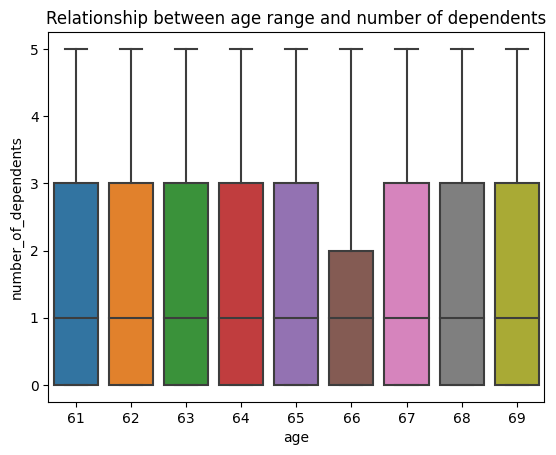

In [33]:
df = result
sns.boxplot(data=df, x='age', y='number_of_dependents')
plt.title('Relationship between age range and number of dependents')
plt.show()

<Axes: xlabel='gender', ylabel='count'>

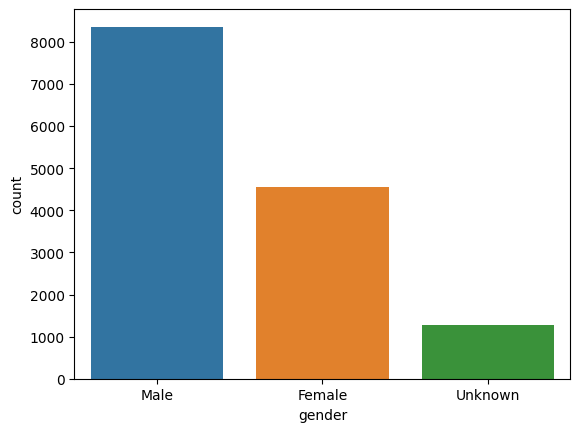

In [34]:
sns.countplot(data=df, x='gender')

<Axes: xlabel='marital_status', ylabel='count'>

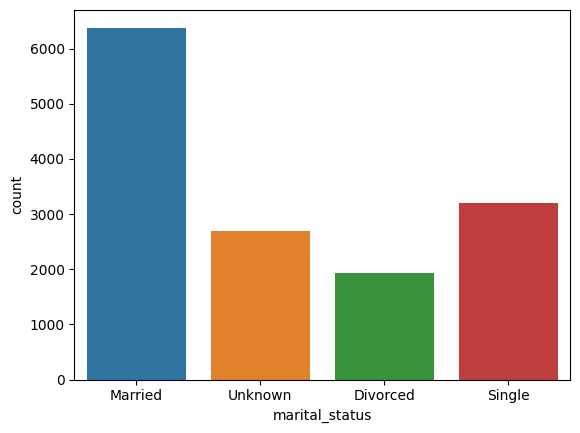

In [35]:
sns.countplot(data=df, x='marital_status')

<Axes: xlabel='gender', ylabel='count'>

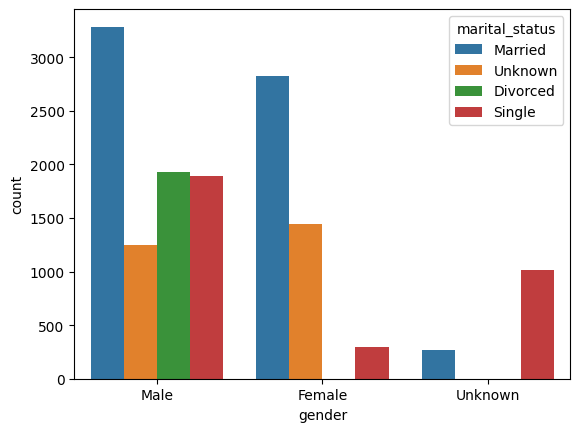

In [36]:
sns.countplot(data=df, x='gender', hue='marital_status')

<Axes: xlabel='number_of_dependents', ylabel='count'>

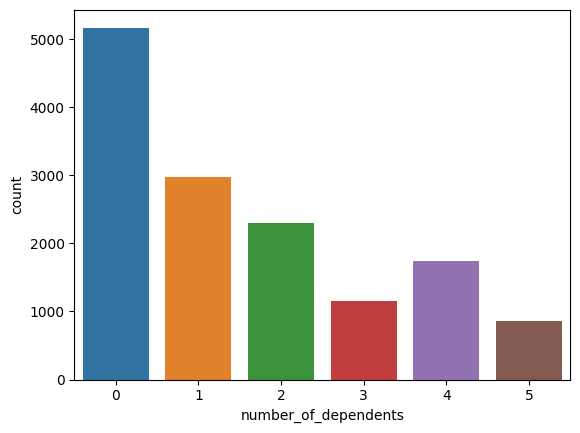

In [37]:
sns.countplot(data=df, x='number_of_dependents')

<Axes: xlabel='asset_objective_id', ylabel='count'>

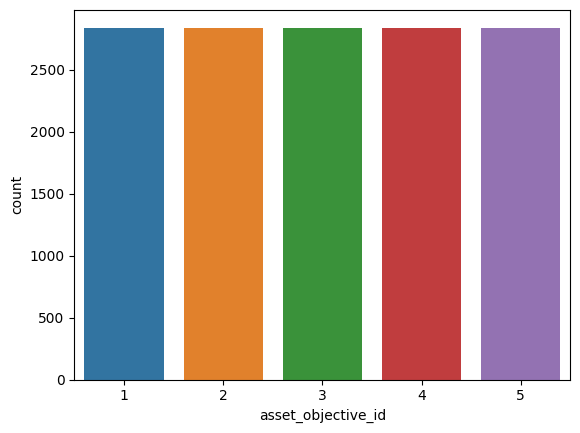

In [38]:
sns.countplot(data=df, x='asset_objective_id')

<Axes: xlabel='number_of_dependents', ylabel='total'>

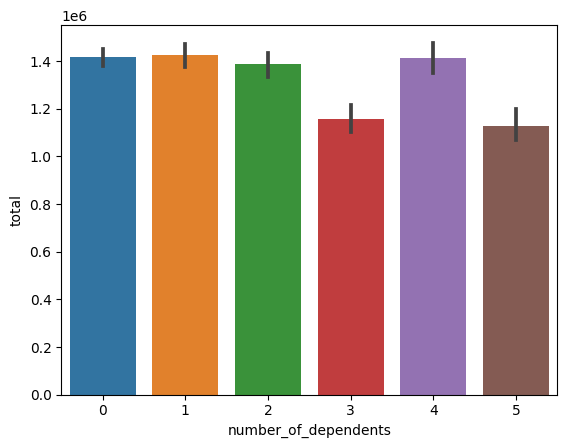

In [39]:
sns.barplot(x='number_of_dependents', y='total', data=df)

In [45]:
q1 = sqldf("select asset_objective_id, sum(total) from result group by asset_objective_id order by sum(total) desc")
print(q1)


   asset_objective_id    sum(total)
0                   4  7.087677e+09
1                   3  5.268625e+09
2                   1  3.586768e+09
3                   5  1.780572e+09
4                   2  1.779182e+09


In [46]:
q2 = sqldf("select number_of_dependents, count(*), sum(total) from result group by number_of_dependents")
print(q2)


   number_of_dependents  count(*)    sum(total)
0                     0      5170  7.314786e+09
1                     1      2980  4.243183e+09
2                     2      2295  3.181420e+09
3                     3      1155  1.336277e+09
4                     4      1745  2.461750e+09
5                     5       855  9.654087e+08


In [47]:
q3 = sqldf("select marital_status, gender, count(*), sum(total) from df group by marital_status, gender order by count(*) desc")
print(q3)


  marital_status   gender  count(*)    sum(total)
0        Married     Male      3285  4.470044e+09
1        Married   Female      2825  5.793156e+09
2       Divorced     Male      1930  1.091621e+09
3         Single     Male      1895  1.993203e+09
4        Unknown   Female      1440  2.481967e+09
5        Unknown     Male      1250  1.430046e+09
6         Single  Unknown      1010  1.328861e+09
7         Single   Female       295  4.581171e+08
8        Married  Unknown       270  4.558109e+08


In [48]:
q4 = sqldf("select number_of_dependents, marital_status, gender, count(*), sum(total) from df group by number_of_dependents, marital_status, gender order by sum(total) desc")
print(q4)


    number_of_dependents marital_status   gender  count(*)    sum(total)
0                      0        Married   Female      1245  2.530583e+09
1                      0        Married     Male      1035  1.389189e+09
2                      1        Married   Female       660  1.364799e+09
3                      0        Unknown   Female       615  1.071388e+09
4                      1        Married     Male       780  1.052258e+09
5                      4        Married   Female       450  9.301224e+08
6                      2        Married   Female       440  8.945909e+08
7                      0         Single     Male       715  7.615289e+08
8                      2        Married     Male       505  7.004566e+08
9                      1        Unknown   Female       325  5.626669e+08
10                     0        Unknown     Male       445  5.005580e+08
11                     4        Married     Male       345  4.826050e+08
12                     2        Unknown   Female   

In [ ]:
# Choosing: married people in age 60-70

In [49]:
m = sqldf("select c.*, a.asset_objective_id, a.total from customer_assets a join customers c on a.customer_id = c.customer_id where c.age>60 and c.age<70 and marital_status == 'Married'")

In [50]:
m.head()

,customer_id,contact_last_name,contact_first_name,street,city,state,zip,country,age,marital_status,gender,number_of_dependents,asset_objective_id,total
0,1,Chaney,Jemima,5584 Orci Street,Lexington,Kentucky,36751,United States,65,Married,Male,0,1,1.157902e+05
1,1,Chaney,Jemima,5584 Orci Street,Lexington,Kentucky,36751,United States,65,Married,Male,0,2,7.978310e+05
2,1,Chaney,Jemima,5584 Orci Street,Lexington,Kentucky,36751,United States,65,Married,Male,0,3,8.950859e+05
3,1,Chaney,Jemima,5584 Orci Street,Lexington,Kentucky,36751,United States,65,Married,Male,0,4,1.115145e+06
4,1,Chaney,Jemima,5584 Orci Street,Lexington,Kentucky,36751,United States,65,Married,Male,0,5,7.920459e+05


In [60]:
query = "select a.*, b.risk_score from m a join risk_score_df b on a.customer_id = b.customer_id order by a.customer_id"
r1 = sqldf(query)
print(r1.head(2))
print("/n")
print(r1['customer_id'].unique())
print(r1['risk_score'].mean())

   customer_id contact_last_name contact_first_name            street  \
0            1            Chaney             Jemima  5584 Orci Street   
1            1            Chaney             Jemima  5584 Orci Street   

        city     state    zip        country  age marital_status gender  \
0  Lexington  Kentucky  36751  United States   65        Married   Male   
1  Lexington  Kentucky  36751  United States   65        Married   Male   

   number_of_dependents  asset_objective_id        total  risk_score  
0                     0                   1  115790.1888    2.833333  
1                     0                   2  797831.0496    2.833333  
/n
[   1    2    4 ... 8680 8682 8683]
2.8153026571130018


In [62]:
print(len(r1['customer_id'].unique()))

1276


In [ ]:
### 

In [ ]:
# SEGMENT 3 
# MARITAL_STATUS 

In [52]:
query = "select c.*, a.asset_objective_id, a.total from customer_assets a join customers c on a.customer_id = c.customer_id"
ms = sqldf(query)
print(ms.head())


print()
print(len(ms['customer_id'].unique()))

   customer_id contact_last_name contact_first_name  \
0            1            Chaney             Jemima   
1            2           Collins               Colt   
2            3          Crawford             Glenna   
3            4            Fisher             Sophia   
4            5          Gonzales               Evan   

                          street       city          state    zip  \
0               5584 Orci Street  Lexington       Kentucky  36751   
1     P.O. Box 643, 8508 At, St.     Boston  Massachusetts  25388   
2  P.O. Box 890, 8204 Lectus Rd.  Milwaukee      Wisconsin  33343   
3        Ap #274-5091 Vel Avenue      Salem         Oregon  90464   
4            798-923 Ante Street    Olympia     Washington  82930   

         country  age marital_status  gender  number_of_dependents  \
0  United States   65        Married    Male                     0   
1  United States   65        Married    Male                     0   
2  United States   65        Unknown    Male

In [53]:
q5 = sqldf("select marital_status, gender, count(*), sum(total) from ms group by marital_status, gender order by sum(total) desc, count(*) desc")
print(q5)


  marital_status   gender  count(*)    sum(total)
0        Married   Female      9225  1.737521e+10
1        Married     Male     11325  1.420203e+10
2        Unknown   Female      5100  8.107966e+09
3         Single     Male      6730  6.417759e+09
4        Unknown     Male      4345  4.477468e+09
5         Single  Unknown      3650  4.305653e+09
6       Divorced     Male      7145  3.761375e+09
7        Married  Unknown      1300  2.060529e+09
8         Single   Female      1180  1.693105e+09


In [58]:
q6 = sqldf("select number_of_dependents, gender, count(*) as cnt, sum(total)/1e+9 from ms group by number_of_dependents, gender order by sum(total) desc, count(*) desc")
print(q6)

    number_of_dependents   gender    cnt  sum(total)/1e+9
0                      0   Female   6910        12.052245
1                      0     Male  10090         9.769837
2                      1   Female   3500         6.158256
3                      1     Male   5775         5.792685
4                      2     Male   4820         4.662451
5                      2   Female   2550         4.491764
6                      4   Female   2400         4.217973
7                      3     Male   3350         3.264556
8                      4     Male   3240         3.161951
9                      5     Male   2270         2.207150
10                     0  Unknown   1240         1.572848
11                     5  Unknown    935         1.178666
12                     3  Unknown    805         1.075569
13                     2  Unknown    775         1.050727
14                     1  Unknown    840         1.045187
15                     4  Unknown    355         0.443185
16            

In [57]:
q6 = sqldf("select number_of_dependents, gender, count(distinct customer_id) as cnt, sum(total)/1e+9 from ms group by number_of_dependents, gender order by sum(total) desc, count(*) desc")
print(q6)

    number_of_dependents   gender   cnt  sum(total)/1e+9
0                      0   Female  1382        12.052245
1                      0     Male  2018         9.769837
2                      1   Female   700         6.158256
3                      1     Male  1155         5.792685
4                      2     Male   964         4.662451
5                      2   Female   510         4.491764
6                      4   Female   480         4.217973
7                      3     Male   670         3.264556
8                      4     Male   648         3.161951
9                      5     Male   454         2.207150
10                     0  Unknown   248         1.572848
11                     5  Unknown   187         1.178666
12                     3  Unknown   161         1.075569
13                     2  Unknown   155         1.050727
14                     1  Unknown   168         1.045187
15                     4  Unknown    71         0.443185
16                     3   Fema

In [ ]:
df = ms
sns.countplot(data=df, x='gender', hue='marital_status')
plt.title('Relationship between gender and marital_status')
plt.show()

In [ ]:
df['age_range'] = pd.cut(df['age'], bins=[20, 30, 40, 50, 60, 70, 80, 90], labels=['20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90'])
sns.countplot(data=df, x='age_range', hue='marital_status')

In [ ]:
df = df[df['gender'] == 'Male']
# df = df[df['gender'] == 'Male']
df['age_range'] = pd.cut(df['age'], bins=[20, 30, 40, 50, 60, 70, 80, 90], labels=['20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90'])
sns.countplot(data=df, x='age_range', hue='marital_status')

In [ ]:
# Married Female 0 dependents 

In [ ]:
# m = sqldf("select c.*, a.asset_objective_id, a.total from customer_assets a join customers c on a.customer_id = c.customer_id")
# query = "select a.*, b.risk_score from m a join risk_score_df b on a.customer_id = b.customer_id order by a.customer_id"
# r1 = sqldf(query)
# print(r1.head(2))

# print(len(r1['customer_id'].unique()))
# r1['risk_score'].mean()

In [ ]:
# Segment 4
# AGE GROUP 30-40 (YOUTH)
# RISK TOLERANCE WAS MORE

In [71]:
query = "select a.*, b.risk_score from customers a join risk_score_df b on a.customer_id = b.customer_id where a.age>=30 and a.age<=40"
r3 = sqldf(query)
print(r3.head(2))

   customer_id contact_last_name contact_first_name  \
0          841               Roy             Tucker   
1          842           Simpson               Oren   

                            street          city     state    zip  \
0  P.O. Box 843, 8127 Augue Avenue    Birmingham   Alabama  36565   
1             723-2566 Aliquet St.  Grand Rapids  Michigan  81003   

         country  age marital_status gender  number_of_dependents  risk_score  
0  United States   33       Divorced   Male                     1    4.142857  
1  United States   33         Single   Male                     1    4.142857  


In [72]:
print(len(r3['customer_id'].unique()))

1618


In [73]:
r3['risk_score'].mean()

3.4503958443698863

In [76]:
max(wealth_investor_constraint['risk_score'])

4.0

In [85]:
m1 = wealth_investor_constraint[wealth_investor_constraint['risk_score'] == 4] 
qr1 = sqldf("select a.age from customers a join m1 b on a.customer_id = b.customer_id order by a.age")
len(qr1)

qr1

,age
0,34
1,35
2,35
3,35
4,35
...,...
302,72
303,73
304,75
305,75


In [86]:
p1 = sqldf("select avg(b.risk_score) from customers a join risk_score_df b on a.customer_id = b.customer_id where a.age>=30 and a.age<=40")
print(p1)

   avg(b.risk_score)
0           3.450396


In [87]:
p2 = sqldf("select avg(b.risk_score) from customers a join risk_score_df b on a.customer_id = b.customer_id where a.age>=40 and a.age<=50")
print(p2)

   avg(b.risk_score)
0           3.208976


In [88]:
p3 = sqldf("select avg(b.risk_score) from customers a join risk_score_df b on a.customer_id = b.customer_id where a.age>=50 and a.age<=60")
print(p3)

   avg(b.risk_score)
0           3.223684


In [89]:
p4 = sqldf("select avg(b.risk_score) from customers a join risk_score_df b on a.customer_id = b.customer_id where a.age>=60 and a.age<=70")
print(p4)

   avg(b.risk_score)
0           3.022712


In [90]:
df_34 = r3

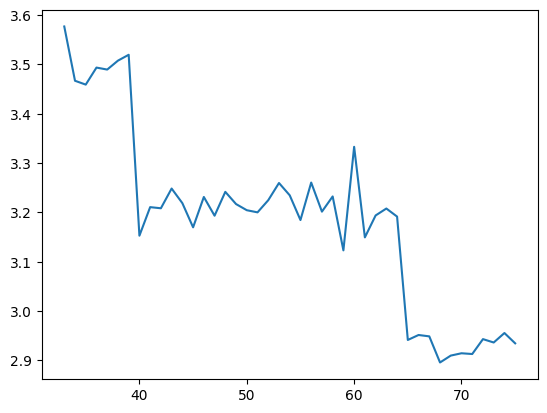

In [66]:
arr1 = r3.groupby('age')['risk_score'].mean()
plt.plot(arr1)

In [91]:
print(len(r3['customer_id'].unique()))

1618


In [107]:
qq = sqldf("select a.*, b.asset_objective_id, b.total from r3 a join customer_assets b on a.customer_id = b.customer_id")
print(qq.head())

   customer_id contact_last_name contact_first_name  \
0          841               Roy             Tucker   
1          841               Roy             Tucker   
2          841               Roy             Tucker   
3          841               Roy             Tucker   
4          841               Roy             Tucker   

                            street        city    state    zip        country  \
0  P.O. Box 843, 8127 Augue Avenue  Birmingham  Alabama  36565  United States   
1  P.O. Box 843, 8127 Augue Avenue  Birmingham  Alabama  36565  United States   
2  P.O. Box 843, 8127 Augue Avenue  Birmingham  Alabama  36565  United States   
3  P.O. Box 843, 8127 Augue Avenue  Birmingham  Alabama  36565  United States   
4  P.O. Box 843, 8127 Augue Avenue  Birmingham  Alabama  36565  United States   

   age marital_status gender  number_of_dependents  risk_score  \
0   33       Divorced   Male                     1    4.142857   
1   33       Divorced   Male                     1

In [ ]:
# Divorced male with 0 dependents

# 0       Divorced     Male       405  1.740426e+08

In [108]:
q9 = sqldf("select number_of_dependents, marital_status, gender, count(*), sum(total) from qq group by number_of_dependents, marital_status, gender order by sum(total) desc")
print(q9)

    number_of_dependents marital_status   gender  count(*)    sum(total)
0                      0        Married   Female       610  9.550973e+08
1                      0        Married     Male       680  7.543386e+08
2                      1        Married   Female       340  5.501204e+08
3                      0        Unknown   Female       380  5.042487e+08
4                      2        Married   Female       270  4.495353e+08
5                      1        Married     Male       345  3.601138e+08
6                      4        Married   Female       200  3.114338e+08
7                      0         Single     Male       405  3.099552e+08
8                      2        Married     Male       295  2.982396e+08
9                      1        Unknown   Female       175  2.482544e+08
10                     3        Married     Male       215  2.455504e+08
11                     0        Unknown     Male       255  2.277733e+08
12                     4        Married     Male   

In [ ]:
# some plots for this

In [ ]:
# SEGMENT 5
# GEOGRAPHICALLY

In [92]:
query = "select a.*, b.risk_score from customers a join risk_score_df b on a.customer_id = b.customer_id"
r4 = sqldf(query)
len(r4)

10000

In [95]:
r4.head()

,customer_id,contact_last_name,contact_first_name,street,city,state,zip,country,age,marital_status,gender,number_of_dependents,risk_score
0,1,Chaney,Jemima,5584 Orci Street,Lexington,Kentucky,36751,United States,65,Married,Male,0,2.833333
1,2,Collins,Colt,"P.O. Box 643, 8508 At, St.",Boston,Massachusetts,25388,United States,65,Married,Male,0,4.000000
2,3,Crawford,Glenna,"P.O. Box 890, 8204 Lectus Rd.",Milwaukee,Wisconsin,33343,United States,65,Unknown,Male,0,3.000000
3,4,Fisher,Sophia,Ap #274-5091 Vel Avenue,Salem,Oregon,90464,United States,65,Married,Female,0,2.833333
4,5,Gonzales,Evan,798-923 Ante Street,Olympia,Washington,82930,United States,65,Married,Female,0,2.833333


In [93]:
q7 = sqldf("select distinct state from r4")
q7

,state
0,Kentucky
1,Massachusetts
2,Wisconsin
3,Oregon
4,Washington
5,Indiana
6,Colorado
7,Pennsylvania
8,Maryland
9,California


In [96]:
q7 = sqldf("select distinct city from r4")
q7

,city
0,Lexington
1,Boston
2,Milwaukee
3,Salem
4,Olympia
...,...
181,Topeka
182,Lincoln
183,Boise
184,Biloxi


In [97]:
# Choosing STATE

<Axes: xlabel='state', ylabel='count'>

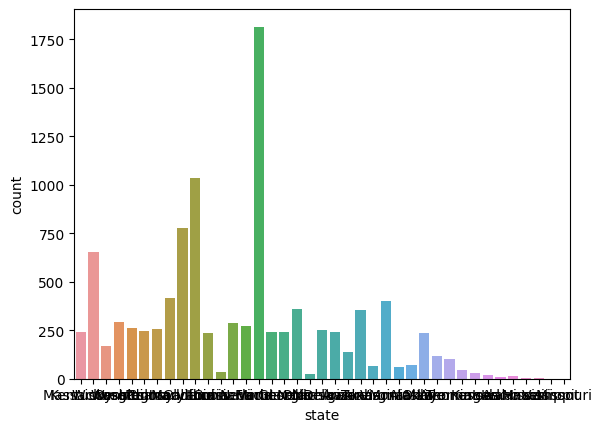

In [98]:
sns.countplot(data = r4, x = 'state')

In [102]:
q8 = sqldf("select distinct state, count(*) from r4 group by state order by count(*) desc")
q8

,state,count(*)
0,Florida,1815
1,California,1037
2,Maryland,775
3,Massachusetts,655
4,Pennsylvania,417
5,Virginia,401
6,Ohio,362
7,Texas,353
8,Oregon,290
9,Connecticut,286


In [103]:
# Highest for 2 states: Florida, California

In [ ]:
# 